Llamando mapa con datos

In [1]:
import pandas as pd
import geopandas as gpd

link="https://github.com/chorrillos/preprocesamiento/raw/main/datadismap.gpkg"
datadismap = gpd.read_file(link, layer='DISTRITO')

In [2]:
datadismap.columns

Index(['DEPARTAMEN', 'PROVINCIA', 'DISTRITO', 'INSTITUCIO', 'Poblacion',
       'Superficie', 'Den_pob', 'RENIEC', 'POB-PEN', 'ES_PRIV', 'ES_PUB',
       'N_COMIS', 'IIEE_PROG_PUB020', 'IIEE_PROG_PRIV2020', 'Latitud',
       'Longitud', 'Ejec_reduc_delit', 'Increm_reduc_delit', 'IDH2019',
       'Educ_sec_comp2019_pct', 'NBI2017_pct',
       'niños_no_asisten_escuela2017_pct', 'Viv_sin_serv_hig2017_pct',
       'pob_inf2018', 'pob_supf2018', 'pct_local_no_cobertura_cell',
       'pct_local_cobertura_cell', 'ZG', 'Delitos', 'TID', 'Delitos_todos',
       'geometry'],
      dtype='object')

Proyección del mapa:

In [3]:
datadismap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
datadismap.describe()

,Poblacion,Superficie,Den_pob,RENIEC,POB-PEN,ES_PRIV,ES_PUB,N_COMIS,IIEE_PROG_PUB020,IIEE_PROG_PRIV2020,...,Increm_reduc_delit,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,niños_no_asisten_escuela2017_pct,Viv_sin_serv_hig2017_pct,pob_inf2018,pob_supf2018,Delitos,TID
count,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,...,1715.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,77.000000,47.0
mean,1.716231e+04,689.613751,439.113292,0.204909,46.400747,7.027748,4.911953,0.732657,42.330309,11.427428,...,198.459408,0.409405,55.769523,38.593330,1.621825,17.068783,24.452886,43.831237,1.909091,1.0
std,5.483361e+04,1922.273572,2350.298705,0.527571,461.146192,38.962113,5.664328,0.864270,55.266189,57.308406,...,957.790536,0.140059,15.728123,18.297153,1.583757,16.354910,14.580073,19.758437,1.171839,0.0
min,1.740000e+02,1.990000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.000000,0.091195,11.974433,1.100000,0.000000,0.000000,0.000000,0.114693,1.000000,1.0
25%,1.907250e+03,92.910000,7.787500,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,0.000000,...,0.000000,0.304729,44.466678,24.900000,0.800000,4.925000,13.260602,28.803857,1.000000,1.0
50%,4.538500e+03,208.010000,20.470000,0.000000,0.000000,0.000000,3.000000,1.000000,25.000000,0.000000,...,26.408805,0.386020,57.164771,35.300000,1.300000,12.050000,23.173419,44.780555,1.000000,1.0
75%,1.136975e+04,500.092500,54.737500,0.000000,0.000000,0.000000,6.000000,1.000000,51.000000,1.000000,...,113.241576,0.507002,68.202230,49.275000,2.000000,24.100000,33.785610,59.259849,3.000000,1.0
max,1.156300e+06,24049.950000,26852.020000,5.000000,14407.000000,649.000000,57.000000,11.000000,508.000000,1174.000000,...,18173.943260,0.845217,91.744878,99.400000,20.000000,96.500000,74.592076,90.477852,6.000000,1.0


Recordar paleta colores aqui: [colores](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

# Explorando el IDH

<AxesSubplot:xlabel='IDH2019', ylabel='Count'>

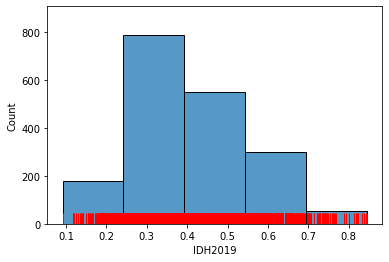

In [5]:
# histograma

import seaborn

ax = seaborn.histplot(datadismap['IDH2019'], bins=5)
# Add rug on horizontal axis
seaborn.rugplot(
    datadismap['IDH2019'], height=0.05, color='red', ax=ax
)

Todos los intervalos posibles:

In [6]:
import mapclassify 
import numpy
numpy.random.seed(12345)

K=5
# mismo ancho interval, posible pocos conteos, interpretacion facil
ei5 = mapclassify.EqualInterval(datadismap['IDH2019'], k=K)
# mismo ancho interval basado en SDs, interpretacion algo facil, inapropiado para valores muy sesgados
msd = mapclassify.StdMean(datadismap['IDH2019'])
# diff ancho interval, conteo similar, interpretacion dificil, repetidos complica cortes                                
q5=mapclassify.Quantiles(datadismap['IDH2019'],k=K)
# diff intervalo basado en similaridad, apropiado para data multimodal
mb5 = mapclassify.MaximumBreaks(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, apropiado para muy sesgada
ht = mapclassify.HeadTailBreaks(datadismap['IDH2019']) 
# diff intervalo basado en similaridad, heuristico
fj5 = mapclassify.FisherJenks(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, optimizador
jc5 = mapclassify.JenksCaspall(datadismap['IDH2019'], k=K)
# diff intervalo basado en similaridad, heuristico
mp5 = mapclassify.MaxP(datadismap['IDH2019'], k=K)   


In [7]:
# resultado de ht
ht

HeadTailBreaks      

  Interval     Count
--------------------
[0.09, 0.41] |  1047
(0.41, 0.54] |   461
(0.54, 0.63] |   211
(0.63, 0.69] |    97
(0.69, 0.75] |    36
(0.75, 0.80] |    10
(0.80, 0.83] |     6
(0.83, 0.84] |     4
(0.84, 0.84] |     1
(0.84, 0.85] |     1

## comparando intervalos

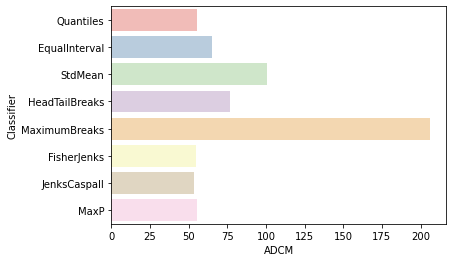

In [8]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = numpy.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = seaborn.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

## seleccionando cortes y añadiendo al data frame

In [9]:
datadismap['Quantiles'] = q5.yb 
datadismap['Equal Interval'] = ei5.yb 
#datadismap['StdMean'] = ei5.yb 
#datadismap['Head-Tail Breaks'] = ht.yb
#datadismap['Maximum Breaks'] = mb5.yb
datadismap['Fisher-Jenks'] = fj5.yb
datadismap['Jenks Caspall'] = jc5.yb
datadismap['MaxP'] = mp5.yb

## solo los intervalos para IDH con ZNG y ZG

In [10]:
clasifIDH=datadismap.loc[:,['DISTRITO','IDH2019','Quantiles', 'Equal Interval',
                            'Fisher-Jenks', 'Jenks Caspall', 'MaxP','ZG']].copy()

clasifIDH.sort_values('IDH2019',inplace=True)
clasifIDH=clasifIDH.drop('IDH2019',axis=1).set_index('DISTRITO')
clasifIDH

,Quantiles,Equal Interval,Fisher-Jenks,Jenks Caspall,MaxP,ZG
DISTRITO,,,,,,
LAGUNAS,0,0,0,0,0,ZNG
CHETILLA,0,0,0,0,0,ZNG
CURGOS,0,0,0,0,0,ZNG
CHACA,0,0,0,0,0,ZNG
SANAGORAN,0,0,0,0,0,ZNG
...,...,...,...,...,...,...
MAGDALENA VIEJA,4,4,4,4,4,ZNG
MAGDALENA DEL MAR,4,4,4,4,4,ZNG
JESUS MARIA,4,4,4,4,4,ZNG


In [11]:
clasifIDH.drop('ZG',axis=1)

,Quantiles,Equal Interval,Fisher-Jenks,Jenks Caspall,MaxP
DISTRITO,,,,,
LAGUNAS,0,0,0,0,0
CHETILLA,0,0,0,0,0
CURGOS,0,0,0,0,0
CHACA,0,0,0,0,0
SANAGORAN,0,0,0,0,0
...,...,...,...,...,...
MAGDALENA VIEJA,4,4,4,4,4
MAGDALENA DEL MAR,4,4,4,4,4
JESUS MARIA,4,4,4,4,4


## solo los intervalos para IDH para ZG

In [12]:
clasifIDH_ZG=clasifIDH[clasifIDH.ZG=='ZG']
clasifIDH_ZG=clasifIDH_ZG.drop("ZG",axis=1)

In [13]:
TheCounts={x:clasifIDH_ZG[x].value_counts(sort=False,dropna=False).to_list() for x in clasifIDH_ZG.columns}
pd.DataFrame({key:pd.Series(value) for key, value in TheCounts.items()})

,Quantiles,Equal Interval,Fisher-Jenks,Jenks Caspall,MaxP
0,11,5.0,9,9,11
1,17,41.0,33,21,17
2,23,20.0,21,26,23
3,15,11.0,11,15,15
4,11,NaN,3,6,11


## Identificando patrones ZG e IDH

In [14]:
ZGlist=datadismap[datadismap.ZG=='ZG'].DISTRITO.to_list()

In [15]:
COLORtextY=['red' if y in ZGlist else 'grey' for y  in clasifIDH.index]

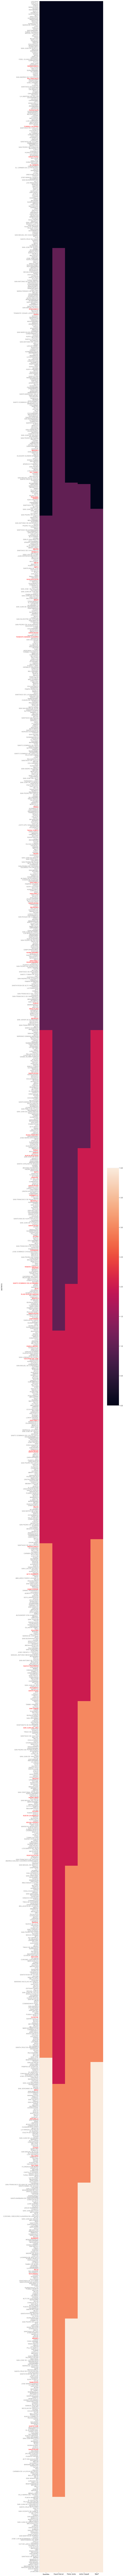

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9,300))
seaborn.set(font_scale=1)

ax = seaborn.heatmap(clasifIDH.drop('ZG',axis=1),yticklabels=1,
    ax=ax)
for aTick,aColor in zip (ax.get_yticklabels(), COLORtextY):
    aTick.set_color(aColor)

In [17]:
q5.counts

array([375, 375, 374, 375, 375])

In [18]:
class5new = q5, ei5, fj5, jc5, mp5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i+1) for i in range(5)]
)

,Quantiles,EqualInterval,FisherJenks,JenksCaspall,MaxP
Class-1,375,180,351,352,370
Class-2,375,789,584,484,380
Class-3,374,549,424,403,371
Class-4,375,301,330,351,381
Class-5,375,55,185,284,372
